## B. Implement 2D Convolution in Python (no libraries)

### 2. Vectorisation, no for loops

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

org = cv2.imread('../../images/me.png')
plt.imshow(cv2.cvtColor(org,cv2.COLOR_BGR2RGB))
plt.show()
greyorg = cv2.cvtColor(org,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(greyorg,cv2.COLOR_BGR2RGB))
plt.show()


In [25]:
def toeplitz(vector):
    matrix = np.zeros((vector.size,vector.size-1))
    for i in range(vector.size): # rows
        for j in range(vector.size - 1): # columns
            if i-j >= 0:
                matrix[i][j] = vector[i-j]
            else:
                matrix[i][j] = 0
    return matrix

In [29]:
print(toeplitz(np.array([30,40,20,10])))

[[30.  0.  0.]
 [40. 30.  0.]
 [20. 40. 30.]
 [10. 20. 40.]]


In [47]:
# 2d convolution using matrix multiplication
# Done by creating a doubly blocked circulant matrix using toeplitz matrices for each row of the filter with the elements of the convolution matrix K, keeping all other elements of the matrix as 0,
# and converting the input image channel M into a column vector of size N times M

def create_toeplitz(vector,rows,columns):
    matrix = np.array()
    for i in range(rows):
        for j in range(columns):
            if i-j >= 0:
                print(i,j)
                matrix[i][j] = vector[i-j]
            else:
                matrix[i][j] = np.zeros((vector[0].size,vector[0].size))
    return matrix

def filter_matrix(k,matrsize, num_rows, num_columns):
    # create convolution matrix
    k = 1/(matrsize*matrsize)*np.array([[1 for i in range(matrsize)] for j in range(matrsize)])
    # create toeplitz matrix for each row
    rows_toeplitz = []
    for i in range(num_rows):
        toeplitz_row = create_toeplitz(k[i],k.shape[0],k.shape[1]-1)
        rows_toeplitz.append(toeplitz_row)

    # create doubly blocked circulant matrix using the row toeplitz matrices
    filter = create_toeplitz(rows_toeplitz,np.array(rows_toeplitz).size,np.array(rows_toeplitz).size-1)
    return filter

def convovle(img,matrsize):
    # create convolution matrix
    k = 1/(matrsize*matrsize)*np.array([[1 for i in range(matrsize)] for j in range(matrsize)])
    
    # define the convolution
    y = img.flatten()
    num_columns = img.shape[0]*img.shape[1]
    num_rows = matrsize
    filter = filter_matrix(k,matrsize,num_rows,num_columns)
    y = np.matmul(filter,y)

    # reshape y to image
    y = np.reshape(y,(img.shape[0],img.shape[1]))
    return y

In [6]:
print(greyorg)
print(greyorg.shape)

[[ 40  38  36 ... 152 154 156]
 [ 39  38  38 ... 151 153 154]
 [ 38  38  40 ... 152 158 158]
 ...
 [220 222 221 ... 124 123 119]
 [220 223 221 ... 121 121 117]
 [221 223 221 ... 118 122 118]]
(828, 1242)


In [31]:
print(np.reshape(np.array([1,2,3,4,5,6,7,8,9,10]),(5,2)))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [38]:
matrsize = 3
k = 1/(matrsize*matrsize)*np.array([[i+j for i in range(matrsize)] for j in range(matrsize)])
print(k)
print(k[0])
print(k.size)

[[0.         0.11111111 0.22222222]
 [0.11111111 0.22222222 0.33333333]
 [0.22222222 0.33333333 0.44444444]]
[0.         0.11111111 0.22222222]
9


In [48]:
k = convovle(greyorg,3)
print(k.shape)

TypeError: array() missing required argument 'object' (pos 0)

In [8]:
print(greyorg.shape)
img = convovle(greyorg,10)
print(img.shape)

(828, 1242)
(828, 1242)


In [9]:
# convolve
blurred_grayorg = convovle(greyorg,10)

In [10]:
matrsize = 10
npconvolved = np.convolve(greyorg,1/(matrsize*matrsize)*np.array([[1 for i in range(matrsize)] for j in range(matrsize)]),"valid")
print(greyorg.shape,npconvolved.shape)
plt.imshow(cv2.cvtColor(greyorg,cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(npconvolved,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(greyorg + greyorg - npconvolved,cv2.COLOR_BGR2RGB))

ValueError: object too deep for desired array

### 3. Using FFT 

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_90624/2321416655.py:15: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(fftshift(filter_fourier))))
/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_90624/2321416655.py:20: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(fftshift(fftconv))))


(828, 1242)


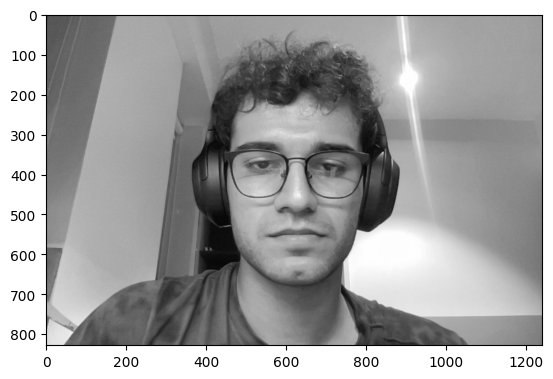

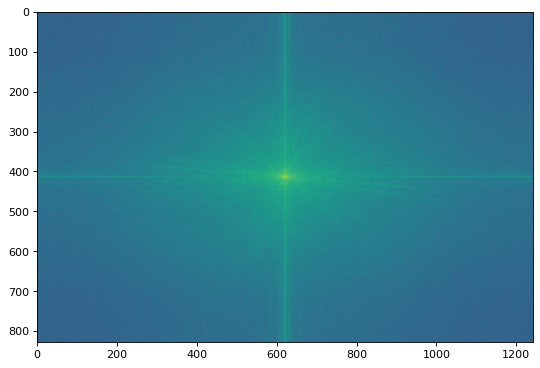

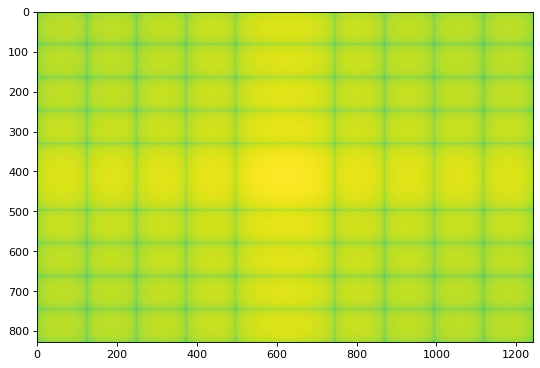

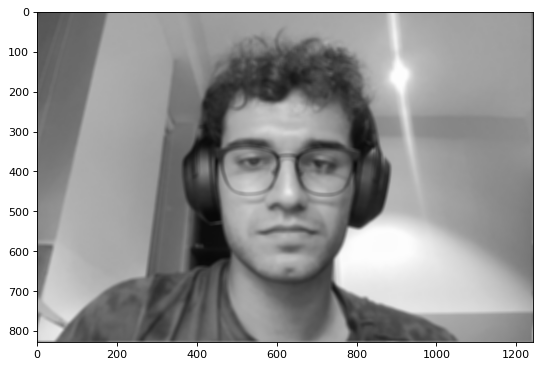

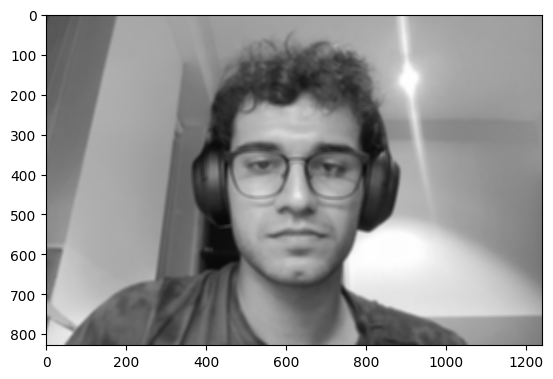

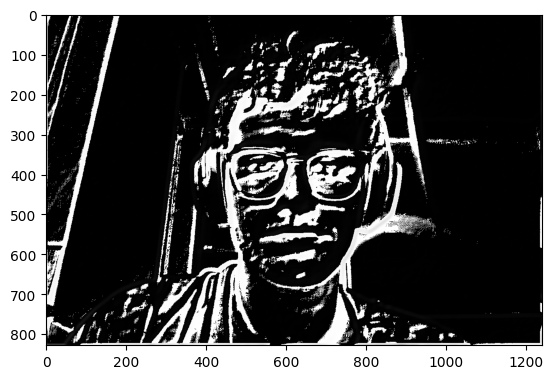

In [108]:
from scipy.fft import fft2, ifft2, fftshift, ifftshift
from scipy.ndimage import uniform_filter

matrsize = 10

plt.imshow(cv2.cvtColor(greyorg,cv2.COLOR_BGR2RGB))
grey_fourier = fft2(greyorg)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fftshift(grey_fourier))))
# create filter matrix
k = 1/(matrsize*matrsize)*np.array([[1 for i in range(matrsize)] for j in range(matrsize)])
k_padded = np.pad(k, ((int(np.floor((greyorg.shape[0] - k.shape[0]) / 2)),int(np.ceil((greyorg.shape[0] - k.shape[0]) / 2))), (int(np.floor((greyorg.shape[1] - k.shape[1]) / 2)),int(np.ceil((greyorg.shape[1] - k.shape[1]) / 2)))))
filter_fourier = fft2(k_padded)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fftshift(filter_fourier))))

# convolution through fft multiplication
fftconv = grey_fourier*filter_fourier
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(fftshift(fftconv))))

# inverse fft
convolved = np.abs(fftshift(ifft2(fftconv))).astype(np.uint8)
print(convolved.shape)
plt.imshow(cv2.cvtColor(convolved,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(cv2blurred,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(cv2blurred - convolved,cv2.COLOR_BGR2RGB))

In [54]:
print(k_padded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
